In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luisfetoga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
class limpieza:

    def solo_letras(self, texto):
        abc = set(list("abcdefghijklmnñopqrstuvwxyz"))
        new_texto = ""
        for i in range(len(texto)):
            if texto[i] not in abc:
                new_texto += " "
            else:
                new_texto += texto[i]
        return new_texto

    def texto(self):
        self.data = self.data.lower()
        self.data = self.data.replace("á", "a").replace("é", "e").replace("í", "i").replace("ó", "o").replace("ú", "u")
        self.data = self.solo_letras(self.data)
        return self.data
    
    def stopwords(self):
        stop = stopwords.words("spanish")
        stop.remove("no")
        self.data = " ".join([item for item in self.data.split() if item not in stop])
        return self.data

    def stem(self):
        stemmer = nltk.SnowballStemmer("spanish")
        self.data = " ".join([stemmer.stem(item) for item in self.data.split()])
        return self.data
    
    def limpiar(self, data):
        self.data = data
        self.texto()
        self.stem()
        self.stopwords()
        return self.data


In [6]:
data = pd.read_csv('tipo2_entrenamiento_estudiantes.csv')

data["Review"] = data["Review"].apply(limpieza().limpiar)

data_train, data_test = train_test_split(data, test_size=0.2)
x_train, x_test = data_train["Review"], data_test["Review"]
y_train, y_test = data_train["Class"], data_test["Class"]

In [7]:
pipeline = make_pipeline(
    TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, ngram_range=(1, 3)),
    LogisticRegression(max_iter=1000)
)

Exactitud:  0.507
Precisión:  0.508
Recall:  0.507
F1:  0.503


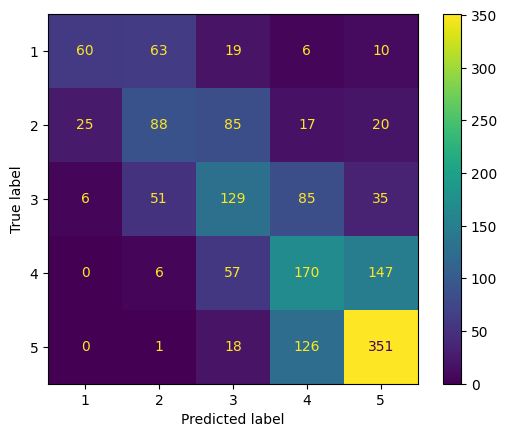

In [8]:
pipeline.fit(x_train, y_train)

pred = pipeline.predict(x_test)

print("Exactitud: ", round(accuracy_score(y_test, pred), 3))
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 3))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'), 3))
print("F1: ", round(f1_score(y_test, pred, average='weighted'), 3))

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()

plt.show()

In [11]:
test = pd.Series(["no", "muy bueno", "malo", "excelente", "pésimo", "muy malo"])

test = test.apply(limpieza().limpiar)

result = pipeline.predict(test)
score = pipeline.predict_proba(test)

for i in range(len(test)):
    print(test[i], ":", result[i], "("+str(round(score[i][result[i]-1]*100,2))+"%)")


no : 5 (32.44%)
buen : 4 (88.46%)
mal : 2 (64.29%)
excelent : 5 (97.35%)
pesim : 1 (87.61%)
mal : 2 (64.29%)


In [12]:
pipeline.predict_proba(test)

array([[1.01272724e-01, 1.23952950e-01, 1.94156744e-01, 2.56227307e-01,
        3.24390275e-01],
       [5.09320428e-04, 2.62587385e-03, 8.28176134e-02, 8.84615937e-01,
        2.94312556e-02],
       [3.16915401e-01, 6.42874345e-01, 3.51810424e-02, 3.78163570e-03,
        1.24757623e-03],
       [2.85989021e-04, 3.89811184e-04, 8.93023179e-04, 2.49239334e-02,
        9.73507243e-01],
       [8.76115996e-01, 7.40019934e-02, 2.24806751e-02, 1.26260156e-02,
        1.47753197e-02],
       [3.16915401e-01, 6.42874345e-01, 3.51810424e-02, 3.78163570e-03,
        1.24757623e-03]])

In [13]:
from joblib import dump, load

dump(pipeline, 'reviewModel.joblib')

['reviewModel.joblib']